# Import the libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


from sklearn.model_selection import train_test_split
import sklearn.neighbors._base
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

from seaborn import heatmap
from sklearn.metrics import classification_report, confusion_matrix

## Load the Data

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")
# view the shape of the dataset
mnist.data.shape

(70000, 784)

In [3]:
pca = PCA(n_components=.95)

### Prepare the Dataset for Machine Learning

In [4]:
X = mnist.data
y = mnist.target

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
X.duplicated().sum()

0

In [8]:
X.isna().sum().sum()

0

## Scale the Data

In [9]:
scaler = StandardScaler() # instantiate the Scaler
scaled_df = scaler.fit_transform(X) # Doing it this way prevents data leakage

## Fit The PCA

In [17]:
pca = PCA(n_components=.95)
pcs = pca.fit_transform(scaled_df)

In [18]:
transformer = make_pipeline(scaler,pca)
transformer

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.95))])

## Train Test Split the Data

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [21]:
knn = KNeighborsClassifier()
knnpca_pipe = make_pipeline(transformer,knn)
knnpca_pipe.fit(X_train,y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=0.95))])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [29]:
def eval_classification(model, X_train, X_test, y_train, y_test):
  print('Train Report:', classification_report(y_train, model.predict(X_train)))
  print('Test Report:', classification_report(y_test, model.predict(X_test)))

  cm = confusion_matrix(y_test, model.predict(X_test))


  plt.figure(figsize=(10, 10))
  heatmap(cm, annot=True,cmap='Blues', fmt='g')
  plt.xlabel('Predicted', fontsize=20)
  plt.ylabel('True', fontsize=20)
  plt.show()

Train Report:               precision    recall  f1-score   support

           0       0.97      0.99      0.98      5189
           1       0.97      0.99      0.98      5900
           2       0.96      0.96      0.96      5229
           3       0.95      0.97      0.96      5335
           4       0.97      0.96      0.96      5237
           5       0.95      0.95      0.95      4706
           6       0.97      0.98      0.98      5115
           7       0.96      0.96      0.96      5415
           8       0.98      0.93      0.96      5168
           9       0.95      0.95      0.95      5206

    accuracy                           0.97     52500
   macro avg       0.96      0.96      0.96     52500
weighted avg       0.97      0.97      0.96     52500

Test Report:               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1714
           1       0.96      0.99      0.97      1977
           2       0.95      0.94      0.94      17

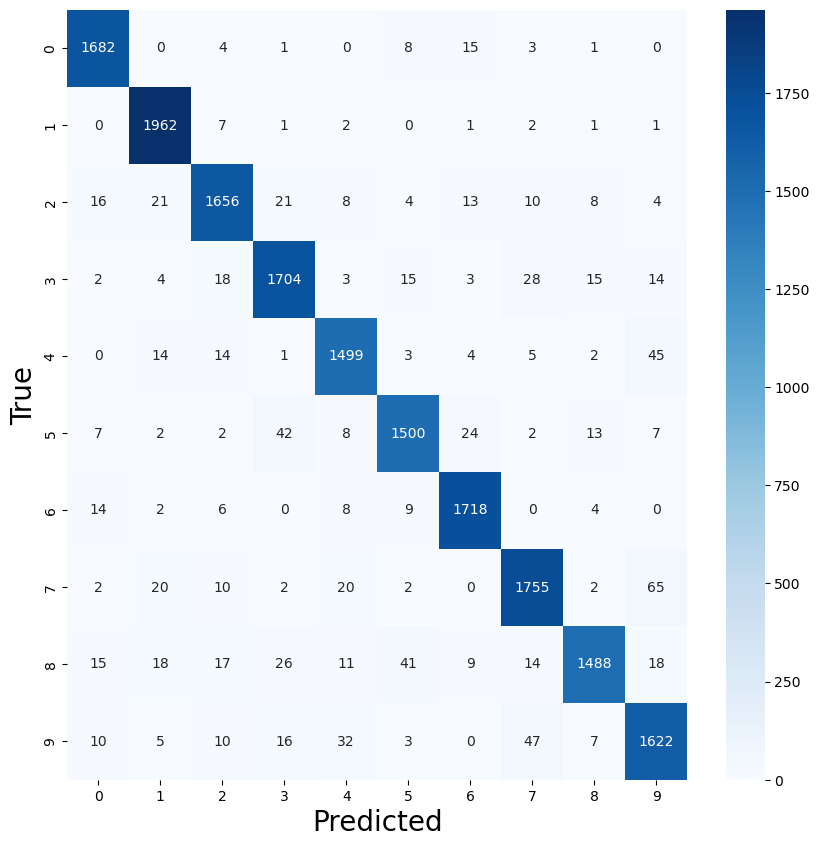

In [36]:
#Evaluate the model
eval_classification(knnpca_pipe,X_train,X_test,y_train,y_test)
# My Model errored out trying to add the time component, it wouldnt accept it 
# but the PCA model performed more rapidly than the standard version

In [33]:
knn = KNeighborsClassifier()
# create the modeling pipeline
knn_pipe = make_pipeline(scaler,knn)
knn_pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

Train Report:               precision    recall  f1-score   support

           0       0.97      0.99      0.98      5189
           1       0.96      0.99      0.98      5900
           2       0.96      0.96      0.96      5229
           3       0.95      0.97      0.96      5335
           4       0.97      0.95      0.96      5237
           5       0.95      0.95      0.95      4706
           6       0.97      0.98      0.98      5115
           7       0.96      0.96      0.96      5415
           8       0.98      0.92      0.95      5168
           9       0.94      0.95      0.95      5206

    accuracy                           0.96     52500
   macro avg       0.96      0.96      0.96     52500
weighted avg       0.96      0.96      0.96     52500

Test Report:               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1714
           1       0.95      0.99      0.97      1977
           2       0.95      0.93      0.94      17

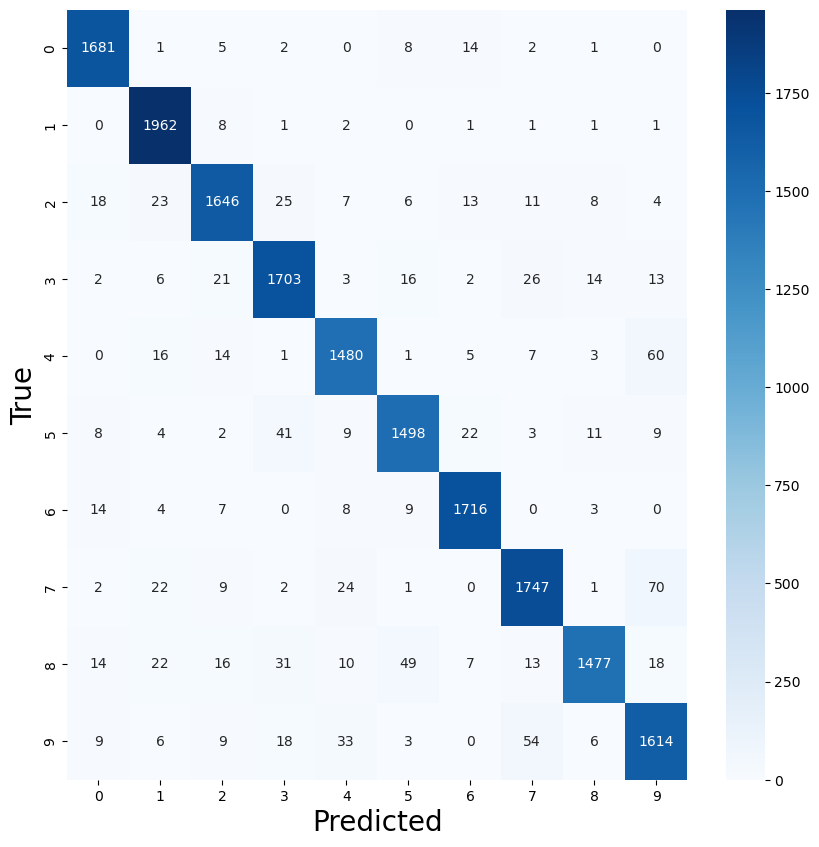

In [38]:
#Evaluate the model

eval_classification(knn_pipe, X_train, X_test, y_train, y_test)

### The PCA infused Model is faster and showed an accuracy in metrics of 95% vs the standard KNN Model without it which took longer to run and had an accuracy of 94%. My conclusion is that there is measurable value in using the PCA fitted model in the future due to its ability to improve accuracy while reducing dimensionality to minimize the GPU cost in processing data. 